In [25]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px
from park import (Park, ParkList, distance_between)
from TSM_parks import tsm_mcmc

In [2]:
parks_df = pd.read_csv('parks.csv')

In [3]:
parks_df.shape[0]

51

In [15]:
def plot_route(route, park_names, latitudes, longitudes, display_text=True):
    """
    Function for plotting national park tours. 
    This function is almost the same as the one on Stanford CS 168's website,
    but I had to make some modifications as that starter code wasn't working for me
    (and I also needed to make the plotting work with my created types).

    Arguments:
        - route: List[int]: The order of the parks to visit (shape (n,))
        - park_names: List[str]: The names of the parks (shape (n,))
        - latitudes: np.ndarray: The latitudes of the parks (shape (n,))
        - longitudes: np.ndarray: The longitudes of the parks (shape (n,))
        - display_text: bool: Whether to display the park names on the map
    """
    fig = px.scatter_geo(
                    lat=latitudes,
                    lon=longitudes,
                    scope='usa',
                    text=park_names if display_text else None,
                    title='Parks in the US',
                    width=800,
                    height=500)


    # add route lines to the map
    for i in range(len(route)):
        i_next = (i + 1) % len(route)
        # fig.add_trace(
        #     px.line_geo(lat=[coords[route[i]][0], coords[route[i_next]][0]],
        #                 lon=[coords[route[i]][1], coords[route[i_next]][1]]).data[0]
        # )

        fig.add_trace(
            px.line_geo(lat=[route[i].lat, route[i_next].lat],
                       lon=[route[i].long, route[i_next].long]).data[0]
        )

        # fig.add_trace(
        #     px.line_geo(lat=[route[i].lat, route[i_next].lat],
        #               lon=[route[i].long, route[i_next].long])
        # )
        

    # set text_size to small
    fig.update_traces(textfont_size=6, textposition='bottom center')

    fig.show()

In [5]:
parks = [Park(name='Pinnacles', state='California', lat=36.48, long=-121.16)]

def row_to_park(row):
    return Park(name=row['Name'], state=row['State'], lat=row['Latitude'], long=row['Longitude'])

parks += [row_to_park(row) for index, row in parks_df.iterrows() if row['Name'] != 'Pinnacles']
parks.append(Park(name='Pinnacles', state='California', lat=36.48, long=-121.16))

In [6]:
print(len(parks))
parks

52


[Park(name='Pinnacles', state='California', lat=36.48, long=-121.16),
 Park(name='Acadia', state='Maine', lat=44.35, long=-68.21),
 Park(name='Arches', state='Utah', lat=38.68, long=-109.57),
 Park(name='Badlands', state='South Dakota', lat=43.75, long=-102.5),
 Park(name='Big Bend', state='Texas', lat=29.25, long=-103.25),
 Park(name='Biscayne', state='Florida', lat=25.65, long=-80.08),
 Park(name='Black Canyon of the Gunnison', state='Colorado', lat=38.57, long=-107.72),
 Park(name='Bryce Canyon', state='Utah', lat=37.57, long=-112.18),
 Park(name='Canyonlands', state='Utah', lat=38.2, long=-109.93),
 Park(name='Capitol Reef', state='Utah', lat=38.2, long=-111.17),
 Park(name='Carlsbad Caverns', state='New Mexico', lat=32.17, long=-104.44),
 Park(name='Channel Islands', state='California', lat=34.01, long=-119.42),
 Park(name='Congaree', state='South Carolina', lat=33.78, long=-80.78),
 Park(name='Crater Lake', state='Oregon', lat=42.94, long=-122.1),
 Park(name='Cuyahoga Valley', st

In [7]:
parklist = ParkList(parks)

In [8]:
print(parklist.total_dist)

962.4141433182225


In [17]:
plot_route(parklist.parks, [park.name for park in parklist.parks],
           [park.lat for park in parklist.parks], [park.long for park in parklist.parks],
           display_text=True)

In [10]:
parklist.swap(1)

In [11]:
parklist.parks

array([Park(name='Pinnacles', state='California', lat=36.48, long=-121.16),
       Park(name='Arches', state='Utah', lat=38.68, long=-109.57),
       Park(name='Acadia', state='Maine', lat=44.35, long=-68.21),
       Park(name='Badlands', state='South Dakota', lat=43.75, long=-102.5),
       Park(name='Big Bend', state='Texas', lat=29.25, long=-103.25),
       Park(name='Biscayne', state='Florida', lat=25.65, long=-80.08),
       Park(name='Black Canyon of the Gunnison', state='Colorado', lat=38.57, long=-107.72),
       Park(name='Bryce Canyon', state='Utah', lat=37.57, long=-112.18),
       Park(name='Canyonlands', state='Utah', lat=38.2, long=-109.93),
       Park(name='Capitol Reef', state='Utah', lat=38.2, long=-111.17),
       Park(name='Carlsbad Caverns', state='New Mexico', lat=32.17, long=-104.44),
       Park(name='Channel Islands', state='California', lat=34.01, long=-119.42),
       Park(name='Congaree', state='South Carolina', lat=33.78, long=-80.78),
       Park(name='Cra

In [12]:
parklist.total_dist

946.2746894875992

Check the swap method functioned properly

In [13]:
old = distance_between(Park(name='Pinnacles', state='California', lat=36.48, long=-121.16),
                 Park(name='Acadia', state='Maine', lat=44.35, long=-68.21))

In [14]:
old+= distance_between(Park(name='Arches', state='Utah', lat=38.68, long=-109.57),
                 Park(name='Badlands', state='South Dakota', lat=43.75, long=-102.5))

In [15]:
new = distance_between(Park(name='Pinnacles', state='California', lat=36.48, long=-121.16),
                 Park(name='Arches', state='Utah', lat=38.68, long=-109.57))

In [16]:
new+= distance_between(Park(name='Acadia', state='Maine', lat=44.35, long=-68.21),
                 Park(name='Badlands', state='South Dakota', lat=43.75, long=-102.5))

In [17]:
new

46.092201938521995

In [18]:
old

62.231655769145405

In [19]:
new - old

-16.13945383062341

Sanity check given by Stanford handout:

In [19]:
distance_between(Park(name='Arches', state='Utah', lat=38.68, long=-109.57),
                 Park(name='Acadia', state='Maine', lat=44.35, long=-68.21))

41.74683820362927

# Test MCMC

In [20]:
new_dist, new_park_list, best_distances, updated_bests, route_updates, updated_iters = tsm_mcmc(parklist, 10_000, 1)

In [21]:
new_dist

685.1283550469221

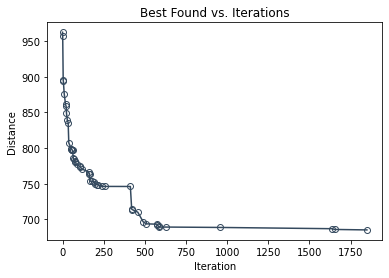

In [22]:
plt.plot(updated_bests, best_distances, marker='o', linestyle='-', color='#34495E', markerfacecolor='none')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.title('Best Found vs. Iterations')

# Set x-axis range from 0 to 10000
# plt.xlim(0, max(updated_iters))

# Show the plot
plt.show()

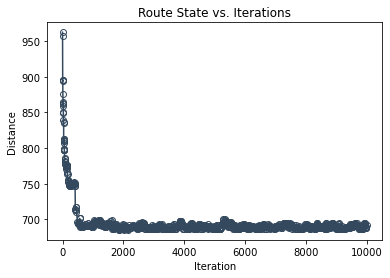

In [23]:
plt.plot(updated_iters, route_updates, marker='o', linestyle='-', color='#34495E', markerfacecolor='none')
plt.xlabel('Iteration')
plt.ylabel('Distance')
plt.title('Route State vs. Iterations')

# Set x-axis range from 0 to 10000
# plt.xlim(0, max(updated_iters))

# Show the plot
plt.show()

In [24]:
plot_route(new_park_list.parks, [park.name for park in new_park_list.parks],
           [park.lat for park in new_park_list.parks], [park.long for park in new_park_list.parks],
           display_text=True)

# MCMC Experiments

## Subsequent Swapping

In [37]:
T_list = [0, 1, 10, 100]
T_dict = {}

In [38]:
for T in T_list:
    T_arr = []
    best_dist = math.inf
    best_park_list = []
    for _ in range(10):
        dist_found, list_found, updated_bests, best_updates, route_vals, route_iters = tsm_mcmc(parklist, 10_000, T=T)
        T_arr.append([updated_bests, best_updates, route_vals, route_iters])

        if dist_found < best_dist:
            best_dist = dist_found
            best_park_list = list_found

    T_dict[f'Temp Val {T}'] = T_arr
    T_dict[f'{T} best'] = (best_dist, best_park_list)

/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_42863/1977125545.py:37: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



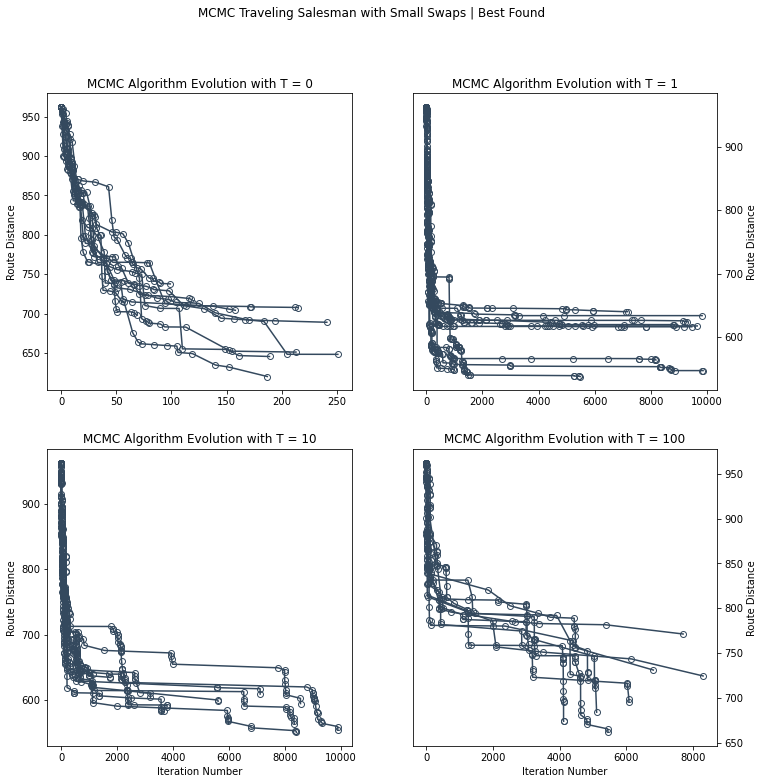

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

T_arr = T_dict['Temp Val 0']
for i in range(10):
    # ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none')
    ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 0].set_ylabel("Route Distance")
ax[0, 0].set_title("MCMC Algorithm Evolution with T = 0")

T_arr = T_dict['Temp Val 1']
for i in range(10):
    ax[0, 1].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 1].set_ylabel("Route Distance")
ax[0, 1].set_title("MCMC Algorithm Evolution with T = 1")

T_arr = T_dict['Temp Val 10']
for i in range(10):
    ax[1, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 0].set_xlabel("Iteration Number")
ax[1, 0].set_ylabel("Route Distance")
ax[1, 0].set_title("MCMC Algorithm Evolution with T = 10")

T_arr = T_dict['Temp Val 100']
for i in range(10):
    ax[1, 1].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 1].set_xlabel("Iteration Number")
ax[1, 1].set_ylabel("Route Distance")
ax[1, 1].set_title("MCMC Algorithm Evolution with T = 100")

ax[0, 1].yaxis.tick_right()
ax[1, 1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

fig.suptitle('MCMC Traveling Salesman with Small Swaps | Best Found')

fig.show()


/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_42863/2196635209.py:37: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



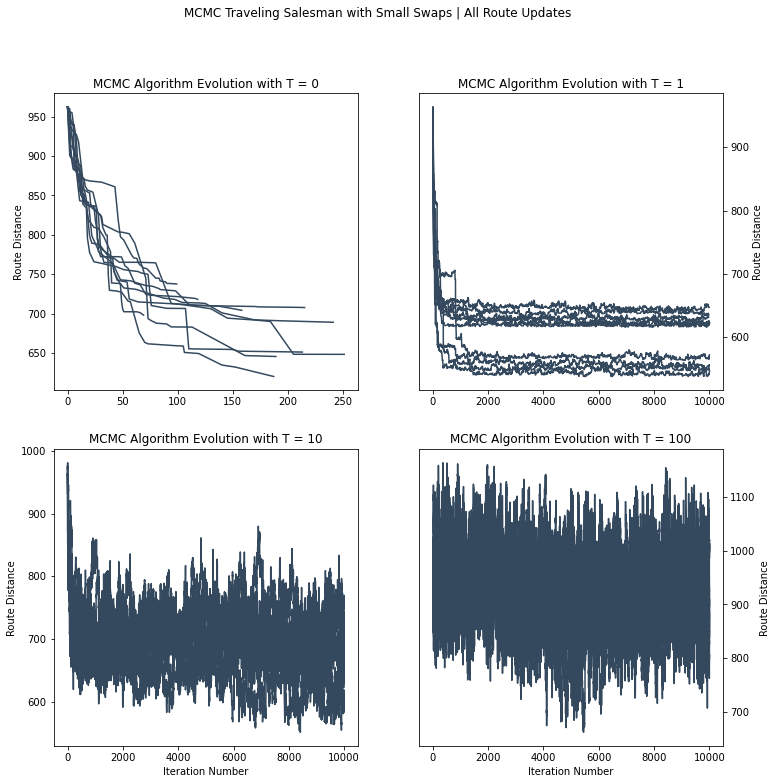

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

T_arr = T_dict['Temp Val 0']
for i in range(10):
    # ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none')
    ax[0, 0].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 0].set_ylabel("Route Distance")
ax[0, 0].set_title("MCMC Algorithm Evolution with T = 0")

T_arr = T_dict['Temp Val 1']
for i in range(10):
    ax[0, 1].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 1].set_ylabel("Route Distance")
ax[0, 1].set_title("MCMC Algorithm Evolution with T = 1")

T_arr = T_dict['Temp Val 10']
for i in range(10):
    ax[1, 0].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 0].set_xlabel("Iteration Number")
ax[1, 0].set_ylabel("Route Distance")
ax[1, 0].set_title("MCMC Algorithm Evolution with T = 10")

T_arr = T_dict['Temp Val 100']
for i in range(10):
    ax[1, 1].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 1].set_xlabel("Iteration Number")
ax[1, 1].set_ylabel("Route Distance")
ax[1, 1].set_title("MCMC Algorithm Evolution with T = 100")

ax[0, 1].yaxis.tick_right()
ax[1, 1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

fig.suptitle('MCMC Traveling Salesman with Small Swaps | All Route Updates')

fig.show()

**BEST FOUND FOR EACH REGIME**

In [39]:
zero_best_dist, zero_best_list = T_dict['0 best']

In [40]:
zero_best_dist

644.6766368362241

In [41]:
plot_route(zero_best_list.parks, [park.name for park in zero_best_list.parks],
           [park.lat for park in zero_best_list.parks], [park.long for park in zero_best_list.parks],
           display_text=True)

In [42]:
one_best_dist, one_best_list = T_dict['1 best']
print(one_best_dist)
plot_route(one_best_list.parks, [park.name for park in one_best_list.parks],
           [park.lat for park in one_best_list.parks], [park.long for park in one_best_list.parks],
           display_text=True)

559.9347281046047


In [43]:
ten_best_dist, ten_best_list = T_dict['10 best']
print(ten_best_dist)
plot_route(ten_best_list.parks, [park.name for park in ten_best_list.parks],
           [park.lat for park in ten_best_list.parks], [park.long for park in ten_best_list.parks],
           display_text=True)

511.13246449942307


In [44]:
hundred_best_dist, hundred_best_list = T_dict['100 best']
print(hundred_best_dist)
plot_route(hundred_best_list.parks, [park.name for park in hundred_best_list.parks],
           [park.lat for park in hundred_best_list.parks], [park.long for park in hundred_best_list.parks],
           display_text=True)

674.7442635394406


## Any Swapping

In [45]:
T_list = [0, 1, 10, 100]
T_dict = {}

In [46]:
for T in T_list:
    T_arr = []
    best_dist = math.inf
    best_park_list = []
    for _ in range(10):
        dist_found, list_found, updated_bests, best_updates, route_vals, route_iters = tsm_mcmc(parklist, 10_000, T=T, large_swap=True)
        T_arr.append([updated_bests, best_updates, route_vals, route_iters])

        if dist_found < best_dist:
            best_dist = dist_found
            best_park_list = list_found

    T_dict[f'Temp Val {T}'] = T_arr
    T_dict[f'{T} best'] = (best_dist, best_park_list)

/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_42863/1977125545.py:37: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



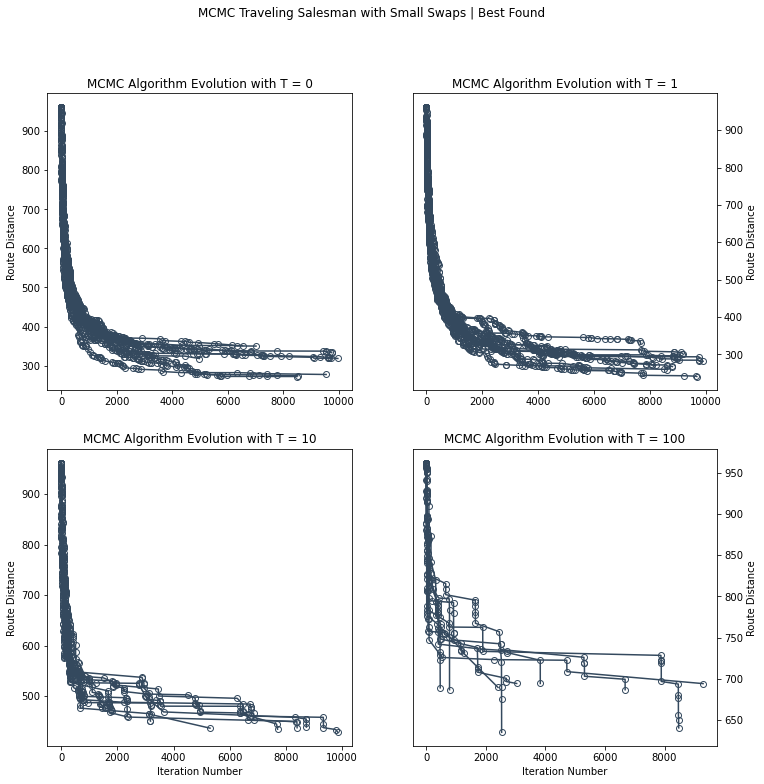

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

T_arr = T_dict['Temp Val 0']
for i in range(10):
    # ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none')
    ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 0].set_ylabel("Route Distance")
ax[0, 0].set_title("MCMC Algorithm Evolution with T = 0")

T_arr = T_dict['Temp Val 1']
for i in range(10):
    ax[0, 1].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 1].set_ylabel("Route Distance")
ax[0, 1].set_title("MCMC Algorithm Evolution with T = 1")

T_arr = T_dict['Temp Val 10']
for i in range(10):
    ax[1, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 0].set_xlabel("Iteration Number")
ax[1, 0].set_ylabel("Route Distance")
ax[1, 0].set_title("MCMC Algorithm Evolution with T = 10")

T_arr = T_dict['Temp Val 100']
for i in range(10):
    ax[1, 1].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 1].set_xlabel("Iteration Number")
ax[1, 1].set_ylabel("Route Distance")
ax[1, 1].set_title("MCMC Algorithm Evolution with T = 100")

ax[0, 1].yaxis.tick_right()
ax[1, 1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

fig.suptitle('MCMC Traveling Salesman with Small Swaps | Best Found')

fig.show()


/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_42863/2196635209.py:37: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



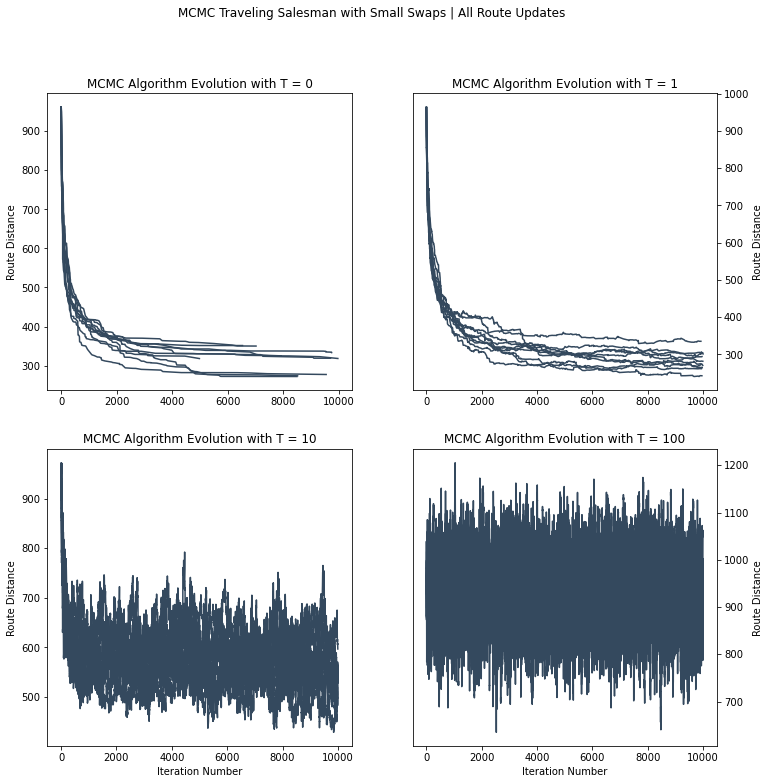

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

T_arr = T_dict['Temp Val 0']
for i in range(10):
    # ax[0, 0].plot(T_arr[i][1], T_arr[i][0], marker='o', linestyle='-', markerfacecolor='none')
    ax[0, 0].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 0].set_ylabel("Route Distance")
ax[0, 0].set_title("MCMC Algorithm Evolution with T = 0")

T_arr = T_dict['Temp Val 1']
for i in range(10):
    ax[0, 1].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[0, 1].set_ylabel("Route Distance")
ax[0, 1].set_title("MCMC Algorithm Evolution with T = 1")

T_arr = T_dict['Temp Val 10']
for i in range(10):
    ax[1, 0].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 0].set_xlabel("Iteration Number")
ax[1, 0].set_ylabel("Route Distance")
ax[1, 0].set_title("MCMC Algorithm Evolution with T = 10")

T_arr = T_dict['Temp Val 100']
for i in range(10):
    ax[1, 1].plot(T_arr[i][3], T_arr[i][2], linestyle='-', markerfacecolor='none', color='#34495E')
ax[1, 1].set_xlabel("Iteration Number")
ax[1, 1].set_ylabel("Route Distance")
ax[1, 1].set_title("MCMC Algorithm Evolution with T = 100")

ax[0, 1].yaxis.tick_right()
ax[1, 1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

fig.suptitle('MCMC Traveling Salesman with Small Swaps | All Route Updates')

fig.show()

In [49]:
zero_best_dist, zero_best_list = T_dict['0 best']
print(zero_best_dist)
plot_route(zero_best_list.parks, [park.name for park in zero_best_list.parks],
           [park.lat for park in zero_best_list.parks], [park.long for park in zero_best_list.parks],
           display_text=True)

271.8926143336378


In [50]:
one_best_dist, one_best_list = T_dict['1 best']
print(one_best_dist)
plot_route(one_best_list.parks, [park.name for park in one_best_list.parks],
           [park.lat for park in one_best_list.parks], [park.long for park in one_best_list.parks],
           display_text=True)

240.81330847926475


In [51]:
ten_best_dist, ten_best_list = T_dict['10 best']
print(ten_best_dist)
plot_route(ten_best_list.parks, [park.name for park in ten_best_list.parks],
           [park.lat for park in ten_best_list.parks], [park.long for park in ten_best_list.parks],
           display_text=True)

428.81118285595915


In [52]:
hundred_best_dist, hundred_best_list = T_dict['100 best']
print(hundred_best_dist)
plot_route(hundred_best_list.parks, [park.name for park in hundred_best_list.parks],
           [park.lat for park in hundred_best_list.parks], [park.long for park in hundred_best_list.parks],
           display_text=True)

634.8942199739434
